<a href="https://colab.research.google.com/github/yapanits111/irisDatasetCARTModel/blob/main/irisCART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Dataset shape: (150, 6)
Class distribution:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Feature summary:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

Classif

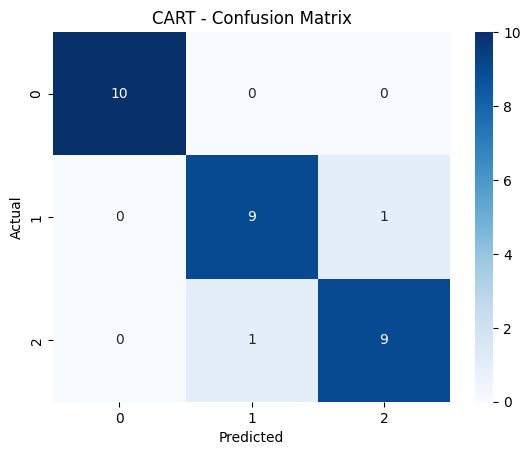

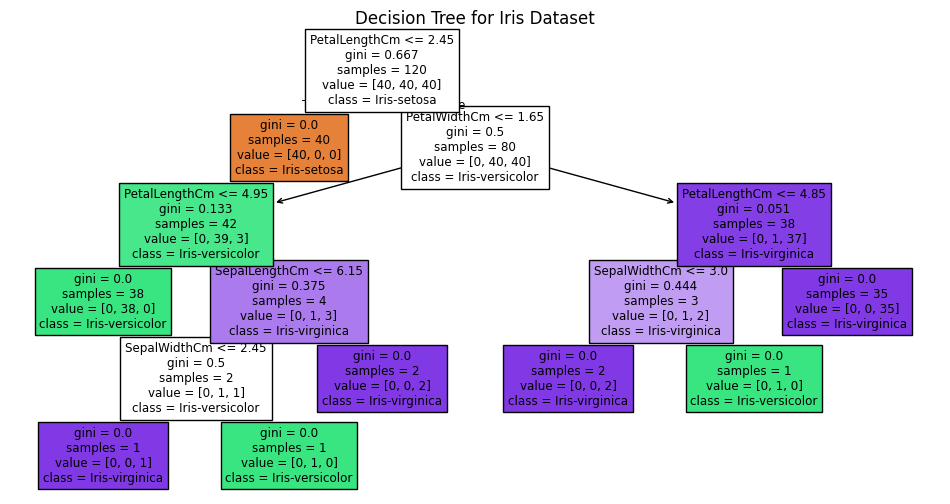

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load iris dataset
df = pd.read_csv('Iris.csv')

# Check for missing values
print("Missing values:\n", df.isna().sum())

# Dataset overview
print("\nDataset shape:", df.shape)
print("Class distribution:\n", df['Species'].value_counts())
print("\nFeature summary:")
print(df.describe())

#Features and target
# Drop the Id column
df.drop(columns=['Id'], inplace=True)
X = df.drop(columns=['Species'])
y = df['Species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train CART model
cart_model = DecisionTreeClassifier(criterion='gini', random_state=42)
cart_model.fit(X_train, y_train)

# Predict
y_pred = cart_model.predict(X_test)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CART - Confusion Matrix")
plt.show()

# Visualize Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(cart_model, feature_names=X.columns, class_names=cart_model.classes_, filled=True)
plt.title("Decision Tree for Iris Dataset")
plt.show()
